##**Rafly Novendra Haikal**
##https://www.dicoding.com/users/raflyhaikal

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-11 09:31:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.29MB/s    in 5m 0s   

2021-06-11 09:36:44 (1.03 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [11]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [8]:
pip install split-folders

In [12]:
import splitfolders

splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors", seed = 1337, ratio = (.6, .4))

Copying files: 2188 files [00:00, 3285.45 files/s]


In [13]:
os.listdir('/tmp/rockpaperscissors/')

['paper',
 'rps-cv-images',
 'val',
 'rock',
 'scissors',
 'README_rpc-cv-images.txt',
 'train']

In [14]:
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

In [15]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_scissorss_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [16]:
train_rock_dir, validation_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_scissorss_dir, validation_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)
train_paper_dir, validation_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

In [18]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [19]:
train_generator = datagen.flow_from_directory(
        base_dir,  
        target_size=(150, 150),
        batch_size=32,
        shuffle=True,
        subset='training',
        class_mode='categorical')  
 
validation_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        subset='validation',
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [25]:
model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs=20, 
      validation_data=validation_generator, 
      validation_steps=4, 
      verbose=2)

Epoch 1/20
25/25 - 43s - loss: 1.0683 - accuracy: 0.4162 - val_loss: 0.8326 - val_accuracy: 0.6328
Epoch 2/20
25/25 - 40s - loss: 0.6666 - accuracy: 0.7299 - val_loss: 0.5355 - val_accuracy: 0.7891
Epoch 3/20
25/25 - 40s - loss: 0.3836 - accuracy: 0.8636 - val_loss: 0.3755 - val_accuracy: 0.8828
Epoch 4/20
25/25 - 40s - loss: 0.2991 - accuracy: 0.8831 - val_loss: 0.2750 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 40s - loss: 0.2257 - accuracy: 0.9299 - val_loss: 0.2751 - val_accuracy: 0.8906
Epoch 6/20
25/25 - 40s - loss: 0.2479 - accuracy: 0.9039 - val_loss: 0.1520 - val_accuracy: 0.9453
Epoch 7/20
25/25 - 40s - loss: 0.1948 - accuracy: 0.9390 - val_loss: 0.2091 - val_accuracy: 0.9297
Epoch 8/20
25/25 - 40s - loss: 0.1472 - accuracy: 0.9532 - val_loss: 0.2349 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 41s - loss: 0.1608 - accuracy: 0.9463 - val_loss: 0.2636 - val_accuracy: 0.9219
Epoch 10/20
25/25 - 40s - loss: 0.1480 - accuracy: 0.9390 - val_loss: 0.1025 - val_accuracy: 0.9609
Epoch 11/

Saving scissors.png to scissors.png
scissors.png
scissors


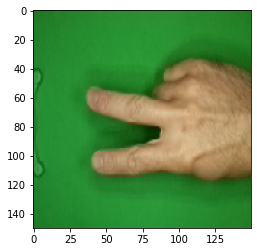

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]==1:
      print('paper')
  elif classes [0,1]==1:
      print('rock')
  else:
      print('scissors')